# Solving the 1-D Eigenvalue Equation  
$$ -\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi = E \psi $$  
## Reduction to dimensionless form  
 Assume natural length scale $l_0$. Let $x=l_0 y$. Substituting gives  
 $$ -\frac{\hbar^2}{2ml_0^2} \frac{d^2\psi}{dy^2} + V(x)\psi = E \psi $$  
 Use $E_0 = \hbar^2/2ml_0^2$ as a natural energy scale. Dividing throughout by $E_0$ gives  
  $$ -\frac{d^2\psi}{dy^2} + U(y)\psi = \epsilon \psi $$  
  where $U(y)=V(l_0 y)/E_0$ and $\epsilon=E/E_0$. The wavefunction satisfies the constraint  
  $$ \int dx |\psi|^2 = 1 $$.  
  We define a dimensionless wavefunction $\phi = \sqrt{l_0}\times \psi$. This 
  satisfies  
  $$ \int dy |\phi|^2 = 1 $$.
  
## Discretization  
We assume that $x \in [-L,L]$. Then, $y \in [-\tilde{L},\tilde{L}]$ where $\tilde{L}=L/l_0$.  
Divide the interval $[-\tilde{L},\tilde{L}]$ into $N$ segments with lattice points labelled by an 
integer $i$ such that $y_i = i\times \Delta$ where $\Delta = 2\tilde{L}/N$. Using the symmetric difference for the 
second derivative in the eigenvalue equation gives (at $y_i$)  
$$-\frac{1}{\Delta^2}\left(\phi_{i+1}-2\phi_i+\phi_{i-1}\right) + U_i \phi_i = \epsilon \phi_i $$  
This equation can be cast in the matrix form  
$$H \phi = \epsilon \phi $$
where the matrix $H$ has elements  
$$H_{ij} = -\frac{1}{\Delta^2}\left(\delta_{i+1,j}-2\delta_{i,j}+\delta_{i-1,j}\right) + U_i \delta_{i,j} $$  
At this point, the eigenvalues and eigenvectors of $H$ can be determined using numpy.  
The normalization constraint on the eigenvectors $\phi$ is  
 $$ \int dy |\phi|^2 = 1 $$  
 which, in discrete form, reduces to
 $$ \Delta \sum_i |\phi_i|^2 = 1 $$

## Example: Harmonic Oscillator

$$V(x) = \frac{1}{2}m\omega^2 x^2$$ 
The natural energy scale is $E_0 = \hbar\omega/2$. The associated length scale $l_0$ can be found using  $E_0 = \hbar^2/2ml_0^2$, which gives $l_0 = \sqrt{\hbar/m\omega}$. The dimensionless eigenvalue equation is  
$$-\frac{d^2\phi}{dy^2} + y^2\phi = \epsilon \phi $$ 

In [ ]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
%matplotlib inline
import math

In [ ]:
delta = 0.01
L = 6. 
N = int(L*100) # No. of lattice points is 2N+1
x = np.arange(-L,L+delta,delta)


In [ ]:
def kronecker(i,j):
    return 1 if i==j else 0

def V(z):
    return z**2

def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V(delta*i) * kronecker(i,j)

In [ ]:
H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

In [ ]:
potential = 0.01*np.array([V(delta*i) for i in range(-N,N+1)]) # Values of U(y) stored at lattice points

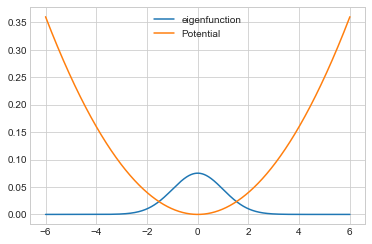

In [ ]:
psi = H_eigenvectors[:,0] # Ground state wavefunction
plt.plot(x, psi, label="eigenfunction")
plt.plot(x, potential, label="Potential")
plt.legend();

In [ ]:
psi.conj().T # Hermitian adjoint of psi

array([1.27831576e-10, 2.56110565e-10, 3.85282805e-10, ...,
       3.85281370e-10, 2.56109662e-10, 1.27831266e-10])

In [ ]:
np.dot(psi.conj().T, psi) # Normalization check 

1.0

In [ ]:
energy_eigenvalue = H_eigenvalues[0]
print(energy_eigenvalue) 

0.9999937499630622


## Exercise: Finite Square Well

In [ ]:
delta = 0.01
L = 10. 
N = int(L*100) # No. of lattice points is 2N+1
x = np.arange(-L,L+delta,delta)
V0 = 2

In [ ]:
def kronecker(i,j):
    return 1 if i==j else 0

def V(z):
    return -V0 if (z >= -0.5 and z < 0.5) else 0

def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V(delta*i) * kronecker(i,j)

In [ ]:
H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

In [ ]:
potential = 0.01 * np.array([V(delta*i) for i in range(-N,N+1)]) # Values of U(y) stored at lattice points

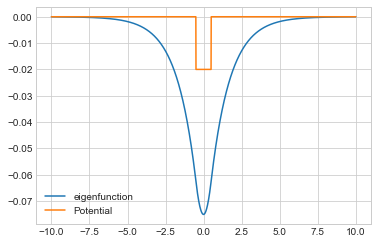

In [ ]:
#fig = plt.figure(figsize=(100,100))
psi = H_eigenvectors[:,0] # Ground state wavefunction
plt.plot(x, psi, label="eigenfunction")
plt.plot(x, potential, label="Potential")
plt.legend();

In [ ]:
psi.conj().T # Hermitian adjoint of psi

array([-5.64734871e-07, -1.12950452e-06, -1.69434373e-06, ...,
       -1.68109911e-06, -1.12067523e-06, -5.60320359e-07])

In [ ]:
np.dot(psi.conj().T, psi) # Normalization check

1.0

In [ ]:
energy_eigenvalue = H_eigenvalues[0]
print(energy_eigenvalue)

-0.6158625868015505


## Circular Lattice

In [ ]:
delta = 0.01
L = 6. 
N = int(L*100) # No. of lattice points is 2N+1
x = np.arange(-L,L+delta,delta)
V0 = 2

In [ ]:
def kronecker(i,j):
    return 1 if i==j else 0

def V(z):
    return -V0 if (z >= -0.5 and z < 0.5) else 0

def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V(delta*i) * kronecker(i,j)

In [ ]:
H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H[0][2*N] = -1/delta**2
H[2*N][0] = -1/delta**2
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

In [ ]:
potential = 0.01 * np.array([V(delta*i) for i in range(-N,N+1)]) # Values of U(y) stored at lattice points

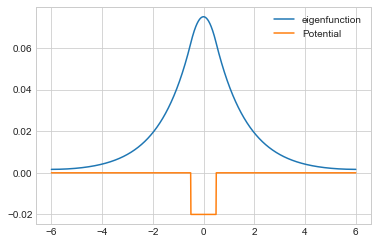

In [ ]:
#fig = plt.figure(figsize=(100,100))
psi = H_eigenvectors[:,0] # Ground state wavefunction
plt.plot(x, psi, label="eigenfunction")
plt.plot(x, potential, label="Potential")
plt.legend();

In [ ]:
psi.conj().T # Hermitian adjoint of psi

array([0.00165851, 0.00165866, 0.00165892, ..., 0.00165866, 0.00165851,
       0.00165846])

In [ ]:
np.dot(psi.conj().T, psi) # Normalization check

1.0

In [ ]:
energy_eigenvalue = H_eigenvalues[0]
print(energy_eigenvalue)

-0.6160791949534982


## Crystal (Translationally Invariant/Periodic Potential)

In [ ]:
delta = 0.01
L = 15. 
N = int(L*100) # No. of lattice points is 2N+1
x = np.arange(-L,L+delta,delta)
V0 = 50

In [ ]:
def kronecker(i,j):
    return 1 if i==j else 0

def V(z):
    return -V0 if (math.floor(z) % 2 == 0) else 0

def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V(delta*i) * kronecker(i,j)

In [ ]:
H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H[0][2*N] = -1/delta**2
H[2*N][0] = -1/delta**2
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

In [ ]:
potential = 0.01 * np.array([V(delta*i) for i in range(-N,N+1)]) # Values of U(y) stored at lattice points

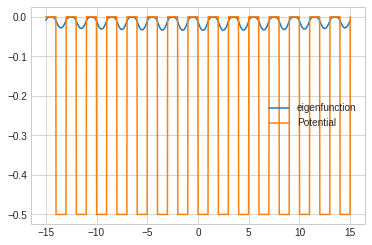

In [ ]:
#fig = plt.figure(figsize=(100,100))
psi = H_eigenvectors[:,0 ] # Ground state wavefunction
plt.plot(x, psi, label="eigenfunction")
plt.plot(x, potential, label="Potential")
plt.legend();

In [ ]:
psi.conj().T # Hermitian adjoint of psi

array([-0.00625911, -0.00568348, -0.00516081, ..., -0.00828423,
       -0.00759123, -0.00689306])

In [ ]:
np.dot(psi.conj().T, psi) # Normalization check

1.0

In [ ]:
energy_eigenvalue = H_eigenvalues[10]
print(energy_eigenvalue)

-73.06483818489781


In [ ]:
fig=plt.figure(figsize=(20,20))
for i in range(len(H_eigenvalues)):
    if H_eigenvalues[i] >= 0: 
        #plt.plot(i, H_eigenvalues[i], 'o')
        plt.axhline(H_eigenvalues[i], lw=0.2)
    else:
        break

<Figure size 1440x1440 with 0 Axes>

## Non Periodic Potential

In [ ]:
delta = 0.01
L = 10. 
N = int(L*100) # No. of lattice points is 2N+1
x = np.arange(-L,L+delta,delta)
V0 = 50

In [ ]:
potential = []
flag = 0
for i in range(-N,N+1):
    if math.floor(delta*i) % 2 == 0:
        if flag == 0:
            temp = np.random.randint(0,2)
        potential.append(-V0*temp)
        flag = 1
    else:
        flag = 0
        potential.append(0)

In [ ]:
def kronecker(i,j):
    return 1 if i==j else 0

#def V(z):
#    return -V0 * np.random.randint(0,2) if (math.floor(z) % 2 == 0) else 0

def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + potential[i] * kronecker(i,j)

In [ ]:
H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H[0][2*N] = -1/delta**2
H[2*N][0] = -1/delta**2
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

In [ ]:
potential = 0.01 * np.array([potential[i] for i in range(-N,N+1)]) # Values of U(y) stored at lattice points

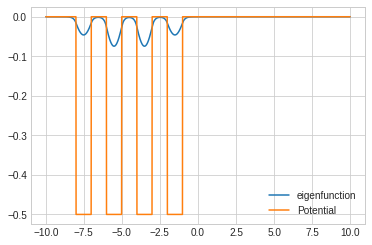

In [ ]:
#fig = plt.figure(figsize=(100,100))
psi = H_eigenvectors[:,0] # Ground state wavefunction
plt.plot(x, psi, label="eigenfunction")
plt.plot(x, potential, label="Potential")
plt.legend();

In [ ]:
psi.conj().T # Hermitian adjoint of psi

array([4.90472158e-11, 5.31166574e-11, 5.71497792e-11, ...,
       3.70560637e-11, 4.08099940e-11, 4.49441038e-11])

In [ ]:
np.dot(psi.conj().T, psi) # Normalization check

1.0

In [ ]:
energy_eigenvalue = H_eigenvalues[0]
print(energy_eigenvalue)

-93.17610588146755


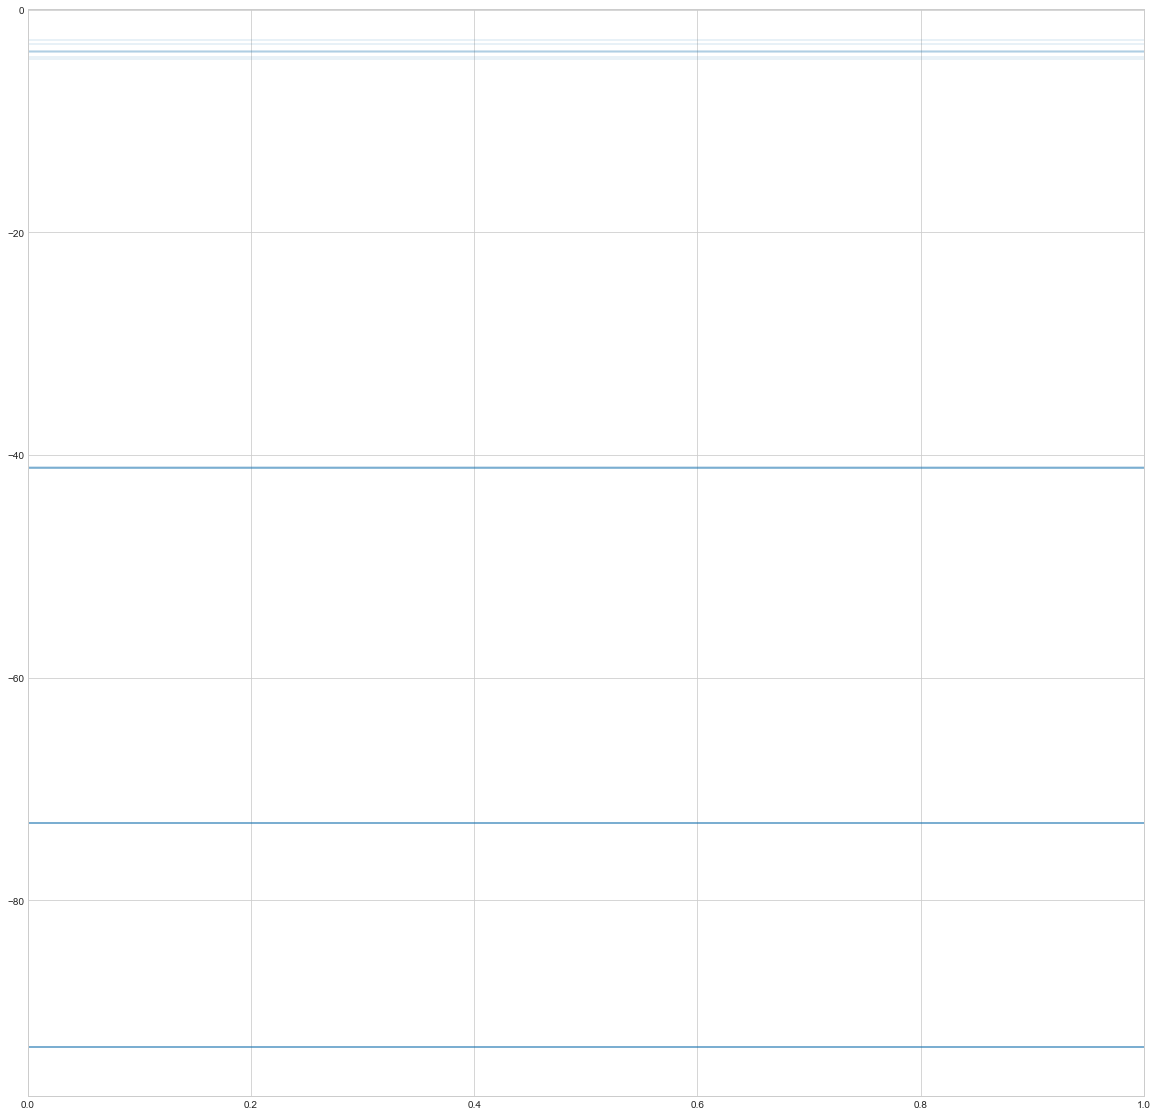

In [ ]:
fig=plt.figure(figsize=(20,20))
for i in range(len(H_eigenvalues)):
    if H_eigenvalues[i] <= 0: 
        #plt.plot(i, H_eigenvalues[i], 'o')
        plt.axhline(H_eigenvalues[i], lw=0.2)
    else:
        break

## Ammonia Molecule

In [ ]:
delta = 0.01
L = 2
N = int(L*100) # No. of lattice points is 2N+1
x = np.arange(-L,L+delta,delta)
V0 = 300

In [ ]:
def kronecker(i,j):
    return 1 if i==j else 0

def V(z):
    return V0 * (z ** 2 - 1) ** 2
def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V(delta*i) * kronecker(i,j)

In [ ]:
H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

In [ ]:
potential = 0.0001 * np.array([V(delta*i) for i in range(-N,N+1)]) # Values of U(y) stored at lattice points

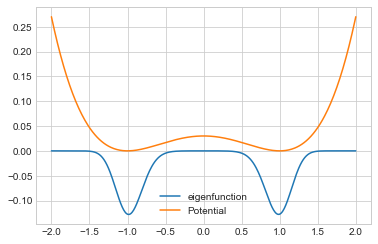

In [ ]:
#fig = plt.figure(figsize=(100,100))
psi = H_eigenvectors[:,0] # Ground state wavefunction
plt.plot(x, psi, label="eigenfunction")
plt.plot(x, potential, label="Potential")
plt.legend();